In [104]:
#import modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#load digits dataset: digits
digits = datasets.load_digits()

In [59]:
#split dataset
from sklearn.model_selection import train_test_split
import numpy as np

#create feature and target arrays
X = digits.data
y = digits.target

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

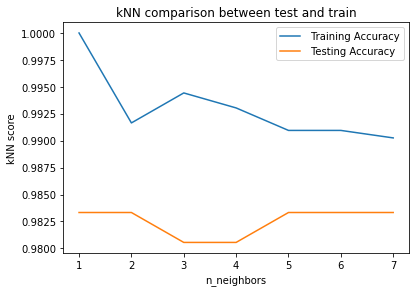

In [62]:
#create dataframe that for loop will add into for plotting later
kNNTrain = []
kNNTest = []

#for loop to run through each variable
for i in range(1,8):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    kNNTrain.append(kNN.score(X_train, y_train))
    kNNTest.append(kNN.score(X_test, y_test))

#convert lists into arrays for plotting
kNNTrain = np.array(kNNTrain)
kNNTest = np.array(kNNTest)

#determine coordinates for plots
x = np.arange(1,8)
yTrain = kNNTrain
yTest = kNNTest

#create a figure
fig1 = plt.figure()

#axes for figure
axes = fig1.add_axes([0.1,0.1,0.8,0.8]) #left, bottom, width, height

#plot on the axes
axes.plot(x, yTrain, label=" Training Accuracy")
axes.plot(x, yTest, label=" Testing Accuracy")
axes.set_xlabel('n_neighbors')
axes.set_ylabel('kNN score')
axes.set_title('kNN comparison between test and train')
axes.legend()

#The results from the below graph are very interesting, particularly that the Training dataset
#gets less accurate the more neighbours, but the testing dataset is most accurate with more.
#Depending on the results given when the dataset is split, generally the highest number of neighbours
#with the highest kNN score. Generally a 5 or above.

In [91]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred= svm.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.89      1.00      0.94        25
           2       1.00      1.00      1.00        40
           3       1.00      0.97      0.98        30
           4       0.97      1.00      0.99        37
           5       0.97      0.97      0.97        40
           6       1.00      0.97      0.99        40
           7       0.98      0.96      0.97        49
           8       0.94      0.97      0.95        32
           9       0.97      0.92      0.94        36

    accuracy                           0.97       360
   macro avg       0.97      0.98      0.97       360
weighted avg       0.98      0.97      0.98       360



0.8531663187195546


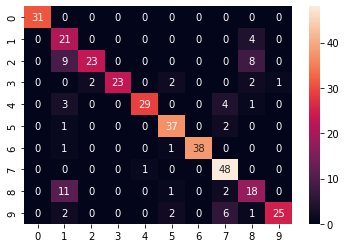

In [79]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred = bayes.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True)


<BarContainer object of 3 artists>

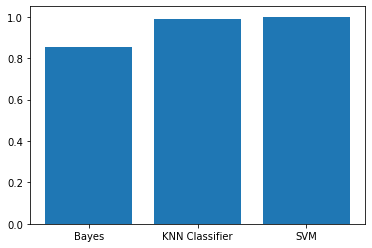

In [97]:
#new variable to call for method score
kNNScore = kNN.score(X_train, y_train)
bayesScore = bayes.score(X_train, y_train)
svmSCore = svm.score(X_train, y_train)

#list data for plot with indexing
scoreData = {'Bayes': bayesScore, 'KNN Classifier': kNNScore, 'SVM': svmScore}
names = list(scoreData.keys())
values = list(scoreData.values())

plt.bar(names, values, data=scoreData)
#print(scoreData)


In [98]:
#load gapminder
df = pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


0.6192442167740035


C:\Users\livya\AppData\Local\Temp\ipykernel_27316\1159782475.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  regression.fit(x[:, None], y)
C:\Users\livya\AppData\Local\Temp\ipykernel_27316\1159782475.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(regression.score(x[:, None], y))
C:\Users\livya\AppData\Local\Temp\ipykernel_27316\1159782475.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')


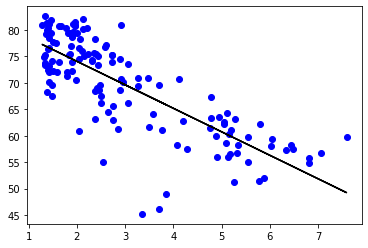

In [109]:
#import library
from sklearn.linear_model import LinearRegression

#Linear Regression
x = df["fertility"]
y = df["life"]

regression = LinearRegression()
regression.fit(x[:, None], y)
print(regression.score(x[:, None], y))

fig, ax = plt.plot(x,y, 'bo', x, regression.predict(x[:, None]), '-k')



<AxesSubplot:>

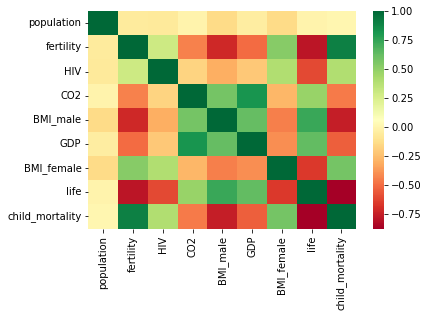

In [170]:
X1 = df[['fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']]
y = df['life']

regression = LinearRegression()
regression.fit(X1, y)
#print(regression.score(X1, y))

corr = df.corr()

sns.heatmap(corr, cmap="RdYlGn", annot=False)
